<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module7/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Word Embeddings**

**Word embedding** is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

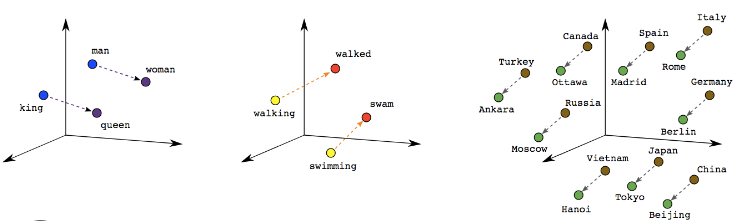

## One-hot or CountVectorizing

The most basic method for transforming words into vectors is to count occurrence of each word in each document. Such approach is called countvectorizing or one-hot encoding.

The main principle of this method is to collect a set of documents (they can be words, sentences, paragraphs or even articles) and count the occurrence of every word in each document. Strictly speaking, the columns of the resulting matrix are words and the rows are documents.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]

In [ ]:
corpus

['Text of the very first new sentence with the first words in sentence.',
 'Text of the second sentence.',
 'Number three with lot of words words words.',
 'Short text, less words.']

In [ ]:
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
term_frequencies = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names()
vocab

['first',
 'in',
 'less',
 'lot',
 'new',
 'number',
 'of',
 'second',
 'sentence',
 'short',
 'text',
 'the',
 'three',
 'very',
 'with',
 'words']

In [ ]:
term_frequencies = term_frequencies.toarray() # convert sparse matrix to numpy array
term_frequencies

array([[2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

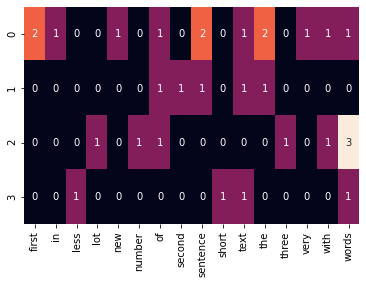

In [ ]:
import seaborn as sns
sns.heatmap(term_frequencies, annot=True, cbar = False, xticklabels = vocab);

In [ ]:
# Convert another document with countvectorizing
vectorizer.transform(['A new new sentence.']).toarray()

array([[0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

Another approach in countvectorizing is just to place 1 if the word is found in the document (no matter how often) and 0 if the word is not found in the document. In this case we get real 'one-hot' encoding.

In [ ]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
one_hot

array([[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

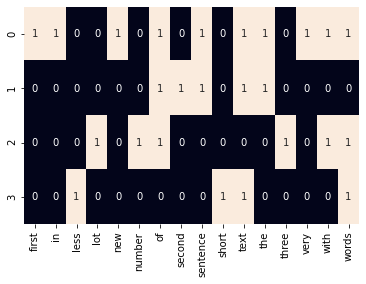

In [ ]:
sns.heatmap(one_hot, annot=True, cbar = False, xticklabels = vocab)

## TF-IDF encoding

With a large corpus of documents some words like ‘a’, ‘the’, ‘is’, etc. occur very frequently but they don’t carry a lot of information. Using one-hot encoding approach we can decide that these words are important because they appear in many documents. One of the ways to solve this problem is stopwords filtering, but this solution is discrete and not flexible.

TF-IDF (term frequency - inverse document frequency) can deal with this problem better. TF-IDF lowers the weight of commonly used words and raises the weight of rare words that occur only in current document. TF-IDF formula looks like this:
<br><br>

$tfidf(term, document)= tf(term, document) \cdot idf(term)$

<br>
Where TF is calculated by dividing number of times the word occurs in the document by the total number of words in the document

$tf(term, document)= \frac{n_i}{\sum_{k=1}^W n_k}$

IDF (inverse document frequency), interpreted like inversed number of documents, in which the term we’re interested in occurs. N - number of documents, n(t) - number of documents with current word or term t.


$idf(term) = \log {\frac{N}{n_t}} $




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

corpus = [
          'Time flies like an arrow.',
          'Fruit flies like a banana.'
]

vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
tfidf

array([[0.49922133, 0.49922133, 0.        , 0.35520009, 0.        ,
        0.35520009, 0.49922133],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

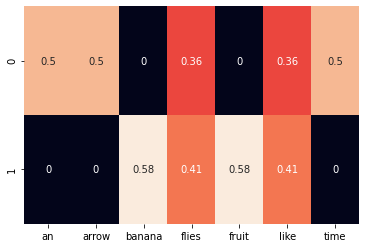

In [ ]:
sns.heatmap(tfidf, annot=True, cbar = False, xticklabels = vocab)

## Word2Vec and GloVe

The most commonly used models for word embeddings are [word2vec](https://github.com/dav/word2vec/) and [GloVe](https://nlp.stanford.edu/projects/glove/) which are both unsupervised approaches based on the distributional hypothesis (words that occur in the same contexts tend to have similar meanings).

Word2Vec word embeddings are vector representations of words,
that are typically learnt by an unsupervised model when fed
with large amounts of text as input (e.g. Wikipedia, science, news, articles etc.). These representation of words capture semantic similarity between words among other properties. Word2Vec word embeddings are learnt in a such way, that [distance](https://en.wikipedia.org/wiki/Euclidean_distance) between vectors for words with close meanings ("king" and "queen" for example) are closer than distance for words with complety different meanings ("king" and "carpet" for example).

![Замещающий текст](https://developers.google.com/machine-learning/crash-course/images/linear-relationships.svg)
Image from [developers.google.com](https://developers.google.com/machine-learning/crash-course/embeddings/translating-to-a-lower-dimensional-space)

Word2Vec vectors even allow some mathematic operations on vectors. For example, in this operation we are using word2vec vectors for each word:

**king - man + woman = queen**

In [ ]:
# Download Google Word2Vec embeddings https://code.google.com/archive/p/word2vec/

!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip GoogleNews-vectors-negative300.bin

--2020-07-24 12:54:45--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.136.77
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.136.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  45.3MB/s    in 36s     

2020-07-24 12:55:21 (43.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
# Try Word2Vec with Gensim

import gensim

# Load pretrained vectors from Google
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
king = model['king']
print(king.shape)
print(king[:10])

(300,)
[ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]


In [ ]:
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man'])[:3])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951)]


In [ ]:
print(model.doesnt_match("breakfast robot dinner lunch".split()))

robot


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.similarity('woman', 'man'))

0.76640123


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.similarity('king', 'woman'))

0.12847973


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Another word embedding method is **Glove** (“Global Vectors”). It is based on matrix factorization techniques on the word-context matrix. It first constructs a large matrix of (words x context) co-occurrence information, i.e. for each “word” (the rows), you count how frequently we see this word in some “context” (the columns) in a large corpus. Then this matrix is factorized to a lower-dimensional (word x features) matrix, where each row now stores a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

In [ ]:
# Try Glove word embeddings with Spacy

!python3 -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=71f23fa6190b30d98a867203431231cf407f0b49982cdc0a9b75a0424c66772b
  Stored in directory: /tmp/pip-ephem-wheel-cache-3xjaaj18/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
# Load the spacy model that you have installed
import en_core_web_lg
nlp = en_core_web_lg.load()
# process a sentence using the model
doc = nlp("man king stands on the carpet and sees woman queen")
# Get the vector for 'king':
doc[1].vector[0:50]

array([ 0.31542  , -0.35068  ,  0.42923  , -0.53825  , -0.1848   ,
       -0.31082  ,  0.29196  , -0.7103   , -0.23867  ,  1.8471   ,
       -0.36446  , -0.51282  ,  0.1221   ,  0.38909  , -0.073204 ,
        0.035462 ,  0.33289  ,  0.66466  ,  0.027175 ,  0.42021  ,
       -0.1452   ,  0.37991  , -0.6052   ,  0.10695  , -0.64716  ,
       -0.010739 , -0.39754  ,  0.38857  , -0.20134  ,  0.69813  ,
       -0.32411  ,  0.73085  , -0.1093   , -0.23511  ,  0.18482  ,
       -0.11595  , -0.71003  , -0.22974  , -0.41979  ,  0.0081004,
       -0.10504  , -0.44802  , -0.073928 , -0.4238   ,  0.28482  ,
       -0.074517 ,  0.098161 ,  0.64602  , -0.25832  , -0.020452 ],
      dtype=float32)

Find similarity between King and Queen (higher value is better).

In [ ]:
doc[1].similarity(doc[9])

0.72526103

Find similarity between King and carpet

In [ ]:
doc[1].similarity(doc[5])

0.20431946

Check if king - man + woman = queen. We will multiply vectors for 'man' and 'woman' by two, because subtracting the vector for 'man' and adding the vector for 'woman' will do little to the original vector for “king”, likely because those “man” and “woman” are related themselves.

In [ ]:
v =  doc[1].vector - (doc[0].vector*2) + (doc[8].vector*2)

In [ ]:
from scipy.spatial import distance
import numpy as np

# Format the vocabulary for use in the distance function
vectors = [token.vector for token in doc]
vectors = np.array(vectors)

# Find the closest word below
closest_index = distance.cdist(np.expand_dims(v, axis = 0), vectors, metric = 'cosine').argmin()
output_word = doc[closest_index].text


In [ ]:
output_word

'queen'

## FastText

[FastText](https://github.com/facebookresearch/fastText) is an extension of word2vec. FastText was developed by the team of Tomas Mikolov who proposed the word2vec framework in 2013.

The main improvement of FastText over the original word2vec vectors is the inclusion of character [n-grams](https://en.wikipedia.org/wiki/N-gram), which allows computing word representations for words that did not appear in the training data (“out-of-vocabulary” words).

In [ ]:
!pip install Cython --install-option="--no-cython-compile"
!pip install fasttext

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)


In [ ]:
# download pre-trained language word vectors from one of 157 languges  https://fasttext.cc/docs/en/crawl-vectors.html
# it will take some time, about 5 minutes
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')


In [ ]:
ft.get_word_vector('king').shape

(300,)

Test model ability to create vectors for unknown words.

In [ ]:
'king' in ft.words

True

In [ ]:
'burgerking' in ft.words

True

In [ ]:
'king-warrior' in ft.words

False

In [ ]:
ft.get_nearest_neighbors('king')

[(0.7550359964370728, 'kings'),
 (0.7068519592285156, 'queen'),
 (0.7060439586639404, 'king-'),
 (0.6811205148696899, 'king.'),
 (0.660710871219635, 'king.The'),
 (0.6591265797615051, 'King'),
 (0.6495252251625061, 'prince'),
 (0.6278106570243835, '-king'),
 (0.6183920502662659, 'monarch'),
 (0.6070184707641602, 'queen-mother')]

In [ ]:
ft.get_nearest_neighbors('burgerking')

[(0.6571484208106995, 'mcdonalds'),
 (0.643631100654602, 'tacobell'),
 (0.6353889107704163, 'macdonalds'),
 (0.6343632340431213, 'Mcdonalds'),
 (0.6275104284286499, 'mcds'),
 (0.6220166087150574, 'pizzahut'),
 (0.6129778623580933, 'arbys'),
 (0.6086134314537048, 'BurgerKing'),
 (0.592319667339325, 'applebees'),
 (0.5817458629608154, 'wendys')]

In [ ]:
ft.get_nearest_neighbors('king-warrior')

[(0.43609192967414856,
  'strachanenlightenmententrepreneursentrepreneurshipenvironmentalismEric'),
 (0.4255003333091736, 'hunter-warrior'),
 (0.39559242129325867, 'NinjaPirateZombieRobot'),
 (0.3859368860721588,
  'deblogueroreflejoantecedentesexitlacuachebateysuteindesignableabsorbersexilatifundiosexibrezarsutemultiétnicosexiplinrapobrezarcorrentosoVd.lazadafisiochillidomabrezarsico-chuzaoutcolodrablogueroin'),
 (0.3846653997898102,
  'ResultsLadderTeamsBluesBrumbiesBullsCheetahsChiefsCrusadersForceHighlandersHurricanesJaguaresKingsLionsRebelsRedsSharksStormersSunwolvesWaratahsPlayersTippingFantasyRugby'),
 (0.37958475947380066,
  'FriendsHungryForAppsSharewareOnSaleDonationCoderGhacks'),
 (0.3776894211769104,
  'ESTATERETAILCONSUMERPHONESCARSBIKESAPPSINTERNETTABLETSCOMPUTERSSOCIETYPOLITICSLAWCRIMEENVIRONMENTSCIENCEARTSCELEBRITIESSPORTSSPECIALSFIRST'),
 (0.37076932191848755,
  'ResultsTeamsBroncosBulldogsCowboysDragonsEelsKnightsPanthersRabbitohsRaidersRoostersSea-EaglesSharksStormTi

## ELMo (Embeddings from Language Models)

Unlike traditional word embeddings such as word2vec and GLoVe, the ELMo vector assigned to a token or word depends on current context and is actually a function of the entire sentence containing that word. So, the same word can have different word vectors under different contexts. Also,  ELMo representations are purely character based, so they are not limited to any predefined vocabulary.

Description from official site:

**[ELMo](https://allennlp.org/elmo)** is a deep contextualized word representation that models both (1) complex characteristics of word use (e.g., syntax and semantics), and (2) how these uses vary across linguistic contexts (i.e., to model polysemy). These word vectors are learned functions of the internal states of a deep bidirectional language model (biLM), which is pre-trained on a large text corpus. They can be easily added to existing models and significantly improve the state of the art across a broad range of challenging NLP problems, including question answering, textual entailment and sentiment analysis.

In [ ]:
# use tensorflow 1.x for ELMo, because trere are still no ELMo for tensorflow 2.0

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
# Download pretrained ELMo model from Tensorflow Hub https://tfhub.dev/google/elmo/3

elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

In [ ]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

sentences

['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
 'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
 'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
 'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

In order to send sentences to the model we need to split them into the arrays of words and pad arrays to the same length. Also we will create 'mask' array, that will show whether element is a real word or a padding symbol (in our case - '_'). We will use 'mask' array for visualization later, to show only real words.

In [ ]:
words = []
mask = []
masked_words = []

for sent in sentences:
  splitted = sent.split()
  for i in range(36):
    try:
      words.append(splitted[i])
    except:
      words.append('_')

for word in words:
  if word == "_":
    mask.append(False)
  else:
    mask.append(True)
    masked_words.append(word)


In [ ]:
len(masked_words)

88

Create embeddings with ELMo:

In [ ]:
embeddings = elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Convert Tensorflow tensors to numpy array.

In [ ]:
%%time
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  x = sess.run(embeddings)

CPU times: user 4.84 s, sys: 540 ms, total: 5.38 s
Wall time: 3.53 s


In [ ]:
x.shape

(4, 36, 1024)

In [ ]:
embs = x.reshape(-1, 1024)
embs.shape

(144, 1024)

In [ ]:
masked_embs = embs[mask]
masked_embs.shape

(88, 1024)

Visualize embeddings using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
y = pca.fit_transform(masked_embs)

from sklearn.manifold import TSNE

y = TSNE(n_components=2).fit_transform(y)

In [ ]:
import plotly as py
import plotly.graph_objs as go


data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        text=[i for i in masked_words],
    marker=dict(
        size=16,
        color = [len(i) for i in masked_words], #set color equal to a variable
        opacity= 0.8,
        colorscale='Viridis',
        showscale=False
    )
    )
]
layout = go.Layout()
layout = dict(
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show()

## Transformers

At last it's time for current state-of-the-art approach - Transformers. Famous [GPT-2](https://openai.com/blog/better-language-models/), [BERT](https://github.com/google-research/bert), [CTRL](https://blog.einstein.ai/introducing-a-conditional-transformer-language-model-for-controllable-generation/) are all Transformers-based and produce context-sensitive embeddings like ELMo. But unlike ELMo Transformers do not use [RNN](https://en.wikipedia.org/wiki/Recurrent_neural_network), trey do not require to process words in sentence sequentially one-by-one. All words in the sentence are processed in parallel, this approach speeds up processing and solves [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Transformers use the [attention mechanizm](https://arxiv.org/abs/1706.03762) to describe the connections and dependencies of each specific word with all other words in the sentence. This mechanism and the main principles of Transformers described in detail in a beautifully illustrated [article](http://jalammar.github.io/illustrated-transformer/) by Jay Alammar.

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png) Image from[ http://jalammar.github.io](http://jalammar.github.io/illustrated-transformer/)



For our example we wil use brilliant [Transformers](https://huggingface.co/transformers/) library, which contains the latest Transformers-based models (such as [BERT](https://huggingface.co/transformers/model_doc/bert.html), [XLNet](https://huggingface.co/transformers/model_doc/xlnet.html), [DialoGPT](https://huggingface.co/transformers/model_doc/dialogpt.html) or [GPT-2](https://huggingface.co/transformers/model_doc/gpt2.html)).

Let's make some embeddings with BERT. Firstly we will need to install Transformers library.

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 4.5MB/s 
     |████████████████████████████████| 3.0MB 26.3MB/s 
     |████████████████████████████████| 1.1MB 33.3MB/s 
     |████████████████████████████████| 890kB 22.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=76991e4939d24ed2935227c6266ef3d73b65be7ca4e5d7f8deb1574bfd0c61da
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


Now we import pytorch, the pretrained BERT model, and a BERT tokenizer, that will do all the needed work of converting sentences into format appropriate for BERT (tokenizing itself and adding special tokens like [SEP] and [CLS]).

In [ ]:
import torch
torch.manual_seed(0)
from transformers import BertTokenizer, BertModel

import logging
import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Enter some sentences and tokenize them.

In [ ]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

sentences

['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
 'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
 'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
 'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0][:99])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0])[:15])

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])


 Original:  king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle 
Tokenized:  ['king', 'arthur', ',', 'also', 'called', 'arthur', 'or', 'aa', '##th', '##ur', 'pen', '##dra', '##gon', ',', 'legendary']
Token IDs:  [2332, 4300, 1010, 2036, 2170, 4300, 2030, 9779, 2705, 3126, 7279, 7265, 7446, 1010, 8987]


Note that some tokens may look like this: ['aa', '##th', '##ur', 'pen', '##dra', '##gon']. This is because of the BERT tokenizer was created with a WordPiece model. This model greedily creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data. BERT tokenizer uses vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on. So, if the word is not mentioned in a vocabulary, that words is splitted into subwords and characters.  The two hash signs (##) before some subwords shows that subword is part of a larger word and preceded by another subword.   

We will use tokenizer.encode_plus function, that will:

- Split the sentence into tokens.
- Add the special [CLS] and [SEP] tokens.
- Map the tokens to their IDs.
- Pad or truncate all sentences to the same length.
- Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
tokenized_texts = []


for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=True,
                        max_length = 48,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Save tokens from sentence as a separate array. We will use it later to explore and compare embeddings.
    marked_text = "[CLS] " + sent + " [SEP]"
    tokenized_texts.append(tokenizer.tokenize(marked_text))

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

# Convert the list into tensor.
input_ids = torch.cat(input_ids, dim=0)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.
Token IDs: tensor([  101,  2332,  4300,  1010,  2036,  2170,  4300,  2030,  9779,  2705,
         3126,  7279,  7265,  7446,  1010,  8987,  2329,  2332,  2040,  3544,
         1999,  1037,  5402,  1997,  5781,  7472,  2015,  1006,  2124,  2004,
         1996,  3043,  1997,  3725,  1007,  2004,  1996, 11074,  1997,  1037,
         5000,  2135,  7881,  1997,  1996,  2461,  2795,   102])


**Segment ID**. BERT is trained on and expects sentence pairs using 1s and 0s to distinguish between the two sentences. We will encode each sentence separately so we will just mark each token in each sentence with 1.

In [ ]:
segments_ids = torch.ones_like(input_ids)
segments_ids.shape

torch.Size([4, 48])

Now we can call BERT model and finally get embeddings.

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
model.eval();

In [ ]:
with torch.no_grad():

    outputs = model(input_ids, segments_ids)

    # Evaluating the model will return a different number of objects based on
    # how it's  configured in the `from_pretrained` call earlier. In this case,
    # becase we set `output_hidden_states = True`, the third item will be the
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

Let's examine what we've got.

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
print ("Number of batches:", len(hidden_states[0]))
print ("Number of tokens:", len(hidden_states[0][0]))
print ("Number of hidden units:", len(hidden_states[0][0][0]))


Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 4
Number of tokens: 48
Number of hidden units: 768


In [ ]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 4, 48, 768])

In [ ]:
# Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]
token_embeddings = token_embeddings.permute(1,2,0,3)

token_embeddings.size()

torch.Size([4, 48, 13, 768])

In [ ]:
# we will use last four hidden layers to create each word embedding

processed_embeddings = token_embeddings[:, :, 9:, :]
processed_embeddings.shape

torch.Size([4, 48, 4, 768])

In [ ]:
# Concatenate four layers for each token to create embeddings

embeddings = torch.reshape(processed_embeddings, (4, 48, -1))
embeddings.shape

torch.Size([4, 48, 3072])

Let's examine embeddings for the first sentence. Firstly we need to get ids of tokens we need to compare.

In [ ]:
for i, token_str in enumerate(tokenized_texts[0]):
  print (i, token_str)

0 [CLS]
1 king
2 arthur
3 ,
4 also
5 called
6 arthur
7 or
8 aa
9 ##th
10 ##ur
11 pen
12 ##dra
13 ##gon
14 ,
15 legendary
16 british
17 king
18 who
19 appears
20 in
21 a
22 cycle
23 of
24 medieval
25 romance
26 ##s
27 (
28 known
29 as
30 the
31 matter
32 of
33 britain
34 )
35 as
36 the
37 sovereign
38 of
39 a
40 knight
41 ##ly
42 fellowship
43 of
44 the
45 round
46 table
47 .
48 [SEP]


We can see that word 'king' is places at indexes 1 and 17. We will check distance between embeddings 1 and 17. Also, we will check if embedding for word 'arthur' is closer to king then word 'table'.

In [ ]:
from scipy.spatial.distance import cosine

kings = cosine(embeddings[0][1], embeddings[0][17])
king_table = cosine(embeddings[0][1], embeddings[0][46])
king_archtur = cosine(embeddings[0][2], embeddings[0][1])

print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

Distance for two kings:  0.21
Distance from king to table:  0.73
Distance from Archtur to king:  0.40


So we see that embeddings for two 'kings' are quite similar but not same, and Archtur is closer to be a king than a table.

Things may be simplier with **[simplerepresentations](https://github.com/AliOsm/simplerepresentations)** module. This module does all the work we did earlier - extracts needed hidden states from BERT and creates embeddings in a few lines of code.

In [ ]:
!pip install simplerepresentations

In [ ]:
import torch
from simplerepresentations import RepresentationModel
torch.manual_seed(0)

model_type = 'bert'
model_name = 'bert-base-uncased'

representation_model = RepresentationModel(
		model_type=model_type,
		model_name=model_name,
		batch_size=4,
		max_seq_length=48, # truncate sentences to be less than or equal to 48 tokens
		combination_method='cat', # concatenate the last `last_hidden_to_use` hidden states
		last_hidden_to_use=4 # use the last 4 hidden states to build tokens representations
	)

text_a = sentences

all_sentences_representations, all_tokens_representations = representation_model(text_a=text_a)

print(all_sentences_representations.shape) # (4, 768) => (number of sentences, hidden size)
print(all_tokens_representations.shape) # (4, 48, 3072) => (number of sentences, number of tokens, hidden size)

Converting to features started.



(4, 768)
(4, 48, 3072)


Check distaces between Archtur, king and table.

In [ ]:
from scipy.spatial.distance import cosine

kings = cosine(all_tokens_representations[0][1], all_tokens_representations[0][17])
king_table = cosine(all_tokens_representations[0][1], all_tokens_representations[0][46])
king_archtur = cosine(all_tokens_representations[0][2], all_tokens_representations[0][1])

print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

Distance for two kings:  0.21
Distance from king to table:  0.73
Distance from Archtur to king:  0.40


Same results, less code.

## Conclusion

I hope that after reading this article you have formed an idea of the current approaches to word embeddings and began to understand how to quickly implement these approaches in Python. The world of NLP is diverse and there are many more models and methods for embeddings. In my article I focused on the most common and those that we ourselves often use in our work. You can find additional information in the **References** section.

## References

- [BERT Word Embeddings Tutorial](https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/)
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
- [FROM Pre-trained Word Embeddings TO Pre-trained Language Models — Focus on BERT](https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598)
- [ Make your own Rick Sanchez (bot) with Transformers and DialoGPT fine-tuning](https://towardsdatascience.com/make-your-own-rick-sanchez-bot-with-transformers-and-dialogpt-fine-tuning-f85e6d1f4e30)
- [Playing with word vectors](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519)
- [Intuitive Guide to Understanding GloVe Embeddings](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)
- [Word Embeddings in Python with Spacy and Gensim](https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/)
- [Brief review of word embedding families (2019) ](https://medium.com/analytics-vidhya/brief-review-of-word-embedding-families-2019-b2bbc601bbfe)
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)